## Test dynamic time wrapping and pearson
Evaulate time series similarities
#### Dynamic time wrapping
Measures similarity between two time series that may vary in speed or timing. It finds an optimal alignment by warping the time axis

#### Pearson coefficient
Measures linear correlation between two time series assuming they’re aligned in time



In [92]:
import numpy as np
from scipy.spatial.distance import euclidean
# from fastdtw import fastdtw
from dtaidistance import dtw, dtw_visualisation
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

#### Prepare data
Test with 3 datasets, static, sine-waves, and upward-random

In [119]:
# Two time series
# s1 = np.array([[v] for v in [1, 2, 3, 4, 2]])
# s2 = np.array([[v] for v in [0, 1, 1, 2, 3, 4, 3]])


# np.random.seed(0)
s1 = np.array([[i + np.random.normal(0, 1)] for i in range(30)])
s2 = np.array([[i * 1.2 + np.random.normal(0, 1.5)] for i in range(30)])


# sinusoidal
# x_vals = np.linspace(0, 4 * np.pi, 100)
# s1 = np.array([[np.sin(x)] for x in x_vals])
# s2 = np.array([[np.sin(x + 0.5)] for x in x_vals])  # Phase shifted

#### Running dynamic time warp

In [120]:
# Running DTW
distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)


print(f"DTW Distance: {distance:.4f}")

DTW Distance: 8.1214


#### Visualization

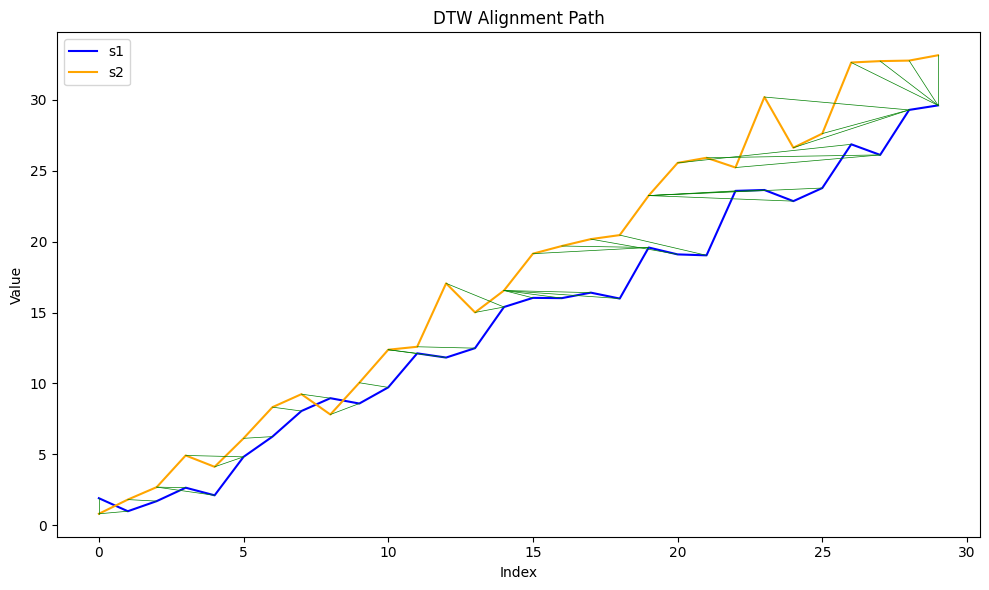

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both time series
ax.plot(range(len(s1)), s1, label='s1', color='blue')
ax.plot(range(len(s2)), s2, label='s2', color='orange')

# Plot alignment lines
for i, j in best_path:
    ax.plot([i, j], [s1[i], s2[j]], color='green', linewidth=0.5)

# Formatting
ax.legend()
ax.set_title('DTW Alignment Path')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

In [122]:
alignment = dtw.warping_path(s1, s2)
warped_series2 = np.array([s2[j] for i, j in alignment])
warped_series1 = np.array([s1[i] for i, j in alignment])

corr, p_value = pearsonr(warped_series1, warped_series2)
print(f"Pearson {corr}")

corr_orig, p_value_orig = pearsonr(s1, s2)
print(f"Pearson on original series {corr_orig}")
# print(alignment)

Pearson [0.99198643]
Pearson on original series [0.98746444]


#### Redo using z-normalization

In [123]:
def z_normalize(ts):
    return (ts - np.mean(ts)) / np.std(ts)

s1z = z_normalize(s1)
s2z = z_normalize(s2)

distance_z, paths = dtw.warping_paths(s1z, s2z)

print(f"DTW Distance: {distance_z:.4f}")

DTW Distance: 0.7398
